In [17]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import hamming
import gudhi as gd
import seaborn as sns

In [23]:
pwd

'/home/jupyter-user4/git/Tesis'

<h3>Se cargan los datos</h3>

In [27]:
#Se cargan las coincidencias obtenidas por el BBH
pseudo_csv=pd.read_csv('pseudomonas.csv', sep=',', header=None,index_col=0)

#Se cargan los nombres comunes de las especies
#pseudo_nombres=pd.read_csv('/files/francisco_esp/Pseudomonas/Pseudomonas.ids', sep='\t', header=None, dtype=str)
#pseudo_nombres.set_index(1,inplace=True)
pseudo_csv.drop(np.NaN,inplace=True)
pseudo_csv.reset_index(inplace=True)
pseudo_csv.drop(columns=0,inplace=True)
pseudo_csv

pseudo_info=pseudo_csv[2]

In [28]:
pseudo_csv

,1,2
0,6666666.136315.1646 -> calcium-dependent-antib...,gi|6666666.136315.1646|6666666.136315|AHZY01|A...
1,6666666.134953.3589 -> polyketide|215|215_1|21...,gi|h.3589|h|AKCL01|Cyclohexadienyl_dehydrogena...
2,6666666.136574.4344 -> OXALACETATE_AMINOACIDS|...,gi|6666666.136574.4344|6666666.136574|ATKI01|A...
3,6666666.135439.1862 -> 3PGA_AMINOACIDS|6|Cyste...,gi|6666666.135439.1862|6666666.135439|JXDG01|C...
4,6666666.136502.4654 -> ALPHAKETOGLUTARATE_AMIN...,gi|6666666.136502.4654|6666666.136502|ATLO01|A...
...,...,...
12128,6666666.102116.464 -> ALPHAKETOGLUTARATE_AMINO...,gi|6666666.102116.464|6666666.102116|NC_015379...
12129,6666666.94971.5998 -> ALPHAKETOGLUTARATE_AMINO...,gi|6666666.94971.5998|6666666.94971|201|Glutam...
12130,6666666.102121.2566 -> ALPHAKETOGLUTARATE_AMIN...,gi|6666666.102121.2566|6666666.102121|AJXG01|N...
12131,6666666.139474.787 -> TCA|1|Citrate_synthase_2...,gi|6666666.139474.787|6666666.139474|LFMR01|Ci...


In [29]:
pseudo_info

0        gi|6666666.136315.1646|6666666.136315|AHZY01|A...
1        gi|h.3589|h|AKCL01|Cyclohexadienyl_dehydrogena...
2        gi|6666666.136574.4344|6666666.136574|ATKI01|A...
3        gi|6666666.135439.1862|6666666.135439|JXDG01|C...
4        gi|6666666.136502.4654|6666666.136502|ATLO01|A...
                               ...                        
12128    gi|6666666.102116.464|6666666.102116|NC_015379...
12129    gi|6666666.94971.5998|6666666.94971|201|Glutam...
12130    gi|6666666.102121.2566|6666666.102121|AJXG01|N...
12131    gi|6666666.139474.787|6666666.139474|LFMR01|Ci...
12132    gi|6666666.135434.3838|6666666.135434|JYHB01|F...
Name: 2, Length: 12133, dtype: object

In [30]:
pseudo_info[1]=pseudo_info[1].replace('6666666.134953','h')

<h3>Con las siguientes funciones se depuran los datos y se elabora el data frame de presencia </h3>

In [31]:
def get_presence(info):
    genomes=set()
    functions=set()
    for name in info:
        split=name.split('|')
        genomes.add(split[-1])
        functions.add(split[4])
    presence=pd.DataFrame(index=list(genomes),columns=list(functions))
    presence=full_presence(info,presence)
    return presence.fillna(0)

In [32]:
def full_presence(info,presence):
    for name in info:
        split=name.split('|')
        presence.loc[split[-1],split[4]]=1
    return presence

In [33]:
pseudo_presence=get_presence(pseudo_info)
pseudo_presence.sort_index(inplace=True)

In [34]:
pseudo_presence

,Paraaminobenzoate_synthase_amidotransferase_component_EC_2.6.1.85,1pyrroline4hydroxy2carboxylate_deaminase_EC_3.5.4.22,Glyoxylate_carboligase_EC_4.1.1.47,Anthranilate_phosphoribosyltransferase_like_EC_2.4.2.18,Valinepyruvate_aminotransferase_EC_2.6.1.66,Threonine_synthase_EC_4.2.3.1,Aspartokinase_EC_2.7.2.4__Diaminopimelate_decarboxylase_EC_4.1.1.20,Imidazoleglycerolphosphate_dehydratase_EC_4.2.1.19,Cysteine_synthase_EC_2.5.1.47,Glutamine_synthetase_EC_6.3.1.2,...,glutamine_synthetase_family_protein,Aspartate_ammonialyase_EC_4.3.1.1,Leucine_dehydrogenase_EC_1.4.1.9,3dehydroquinate_synthase_EC_4.2.3.4,Phosphoribosylformimino5aminoimidazole_carboxamide_ribotide_isomerase_EC_5.3.1.16,Cysteine_synthase_B_EC_2.5.1.47,Anthranilate_phosphoribosyltransferase_EC_2.4.2.18,Glutamine_synthetase_EC_6.3.1.2_putative,Tryptophan_synthase_beta_chain_EC_4.2.1.20,3isopropylmalate_dehydrogenase_EC_1.1.1.85
PseudomonasabietaniphilaBBQJ01,0,1,0,0,1,1,0,1,1,0,...,1,1,1,1,1,1,1,0,1,1
PseudomonasabietaniphilaBBQR01,0,1,0,0,1,1,0,1,1,0,...,1,0,1,1,1,1,1,0,1,1
Pseudomonasaeruginosa19brAFXJ01,0,1,0,0,1,1,0,1,1,0,...,1,0,0,1,1,1,1,1,1,1
Pseudomonasaeruginosa3573JIEN01,0,1,0,0,1,1,0,1,1,0,...,1,0,0,1,1,1,1,1,1,1
PseudomonasaeruginosaCCVU01,0,1,0,0,1,1,0,1,1,0,...,1,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PseudomonasxanthomarinaCCYE01,0,0,0,0,0,1,0,1,1,1,...,1,0,0,1,1,1,1,0,1,1
PseudomonasxinjiangensisNRRLB51270,0,0,0,0,0,1,0,0,1,0,...,1,0,0,1,1,1,1,0,1,1
PseudomonasyangmingensisDSM24213,0,0,0,0,0,1,0,1,1,0,...,1,0,0,1,1,1,1,0,1,1
PseudomonaszeshuiiKACC15471,0,1,0,0,1,1,0,1,1,0,...,1,0,0,1,1,1,1,0,1,1


In [35]:
pseudo_presence.drop('PseudomonasindicaNBRC103045',inplace=True)

In [36]:
orden=pseudo_presence.sum(axis=1)
pseudo_presence['orden']=orden

In [37]:
pseudo_presence.sort_values(by=['orden'],inplace=True)

In [38]:
pseudo_presence

,Paraaminobenzoate_synthase_amidotransferase_component_EC_2.6.1.85,1pyrroline4hydroxy2carboxylate_deaminase_EC_3.5.4.22,Glyoxylate_carboligase_EC_4.1.1.47,Anthranilate_phosphoribosyltransferase_like_EC_2.4.2.18,Valinepyruvate_aminotransferase_EC_2.6.1.66,Threonine_synthase_EC_4.2.3.1,Aspartokinase_EC_2.7.2.4__Diaminopimelate_decarboxylase_EC_4.1.1.20,Imidazoleglycerolphosphate_dehydratase_EC_4.2.1.19,Cysteine_synthase_EC_2.5.1.47,Glutamine_synthetase_EC_6.3.1.2,...,Aspartate_ammonialyase_EC_4.3.1.1,Leucine_dehydrogenase_EC_1.4.1.9,3dehydroquinate_synthase_EC_4.2.3.4,Phosphoribosylformimino5aminoimidazole_carboxamide_ribotide_isomerase_EC_5.3.1.16,Cysteine_synthase_B_EC_2.5.1.47,Anthranilate_phosphoribosyltransferase_EC_2.4.2.18,Glutamine_synthetase_EC_6.3.1.2_putative,Tryptophan_synthase_beta_chain_EC_4.2.1.20,3isopropylmalate_dehydrogenase_EC_1.1.1.85,orden
PseudomonasxinjiangensisNRRLB51270,0,0,0,0,0,1,0,0,1,0,...,0,0,1,1,1,1,0,1,1,45
PseudomonashussainiiJCM19513,0,0,0,0,0,1,0,1,1,0,...,1,0,1,1,1,1,0,1,1,45
PseudomonasyangmingensisDSM24213,0,0,0,0,0,1,0,1,1,0,...,0,0,1,1,1,1,0,1,1,46
PseudomonasformosensisJCM18415,0,0,0,0,0,1,0,0,1,0,...,0,0,1,1,1,1,0,1,1,46
PseudomonaspohangensisDSM17875,0,0,0,0,1,1,0,0,1,0,...,0,0,1,1,1,1,0,1,1,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pseudomonasfluorescenswayne1CADX01,0,1,0,0,1,1,0,1,1,0,...,0,0,1,1,1,1,1,1,1,53
pseudomonassp81,0,1,0,0,1,1,0,1,1,0,...,0,0,1,1,1,1,1,1,1,53
Pseudomonasumsongensis20MFCvi11ARIW01,0,1,0,0,1,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,54
Pseudomonasumsongensisunc430cl58colJHVT01,0,1,0,0,1,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,54


In [39]:
# Let's assume that "population" is a numpy ndarray with your genomes as rows.
def calculate_hamming_matrix(population):
    # Number of genomes
    num_genomes = population.shape[0]
    # Create an empty matrix for Hamming distances
    hamming_matrix = np.zeros((num_genomes, num_genomes), dtype=int)
   # Calculate the Hamming distance between each pair of genomes
    for i in range(num_genomes):
        for j in range(i+1, num_genomes):  # j=i+1 to avoid calculating the same distance twice
            # The Hamming distance is multiplied by the number of genes to convert it into an absolute distance
            distance = hamming(population[i], population[j]) * len(population[i])
            hamming_matrix[i, j] = distance
            hamming_matrix[j, i] = distance  # The matrix is symmetric
    
    return hamming_matrix

In [40]:
def create_complex(distance_matrix2):
    # Create the Rips simplicial complex from the distance matrix
    rips_complex = gd.RipsComplex(distance_matrix=distance_matrix2)
    # Create the simplex tree from the Rips complex with a maximum dimension of 3
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    # Compute the persistence of the simplicial complex
    persistence = simplex_tree.persistence()
    # Return the persistence diagram or barcode
    return persistence, simplex_tree


In [41]:
matriz_pseudo=calculate_hamming_matrix(pseudo_presence.drop(columns=['orden']).values)
#matriz_actino=calculate_hamming_matrix(actino_presence.values)

In [42]:
matriz_pseudo

array([[ 0,  8,  9, ..., 13, 13, 13],
       [ 8,  0,  5, ..., 11, 11, 11],
       [ 9,  5,  0, ..., 12, 12, 12],
       ...,
       [13, 11, 12, ...,  0,  0,  0],
       [13, 11, 12, ...,  0,  0,  0],
       [13, 11, 12, ...,  0,  0,  0]])

In [43]:
matriz_pseudo.argmax()

4661

In [44]:
complex_pseudo=create_complex(matriz_pseudo)

<AxesSubplot:>

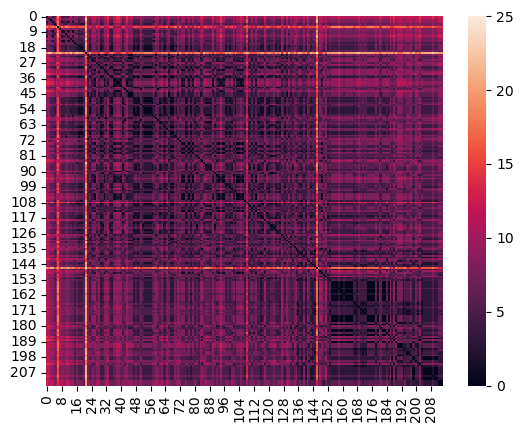

In [45]:
sns.heatmap(matriz_pseudo)

<AxesSubplot:title={'center':'Persistence barcode'}>

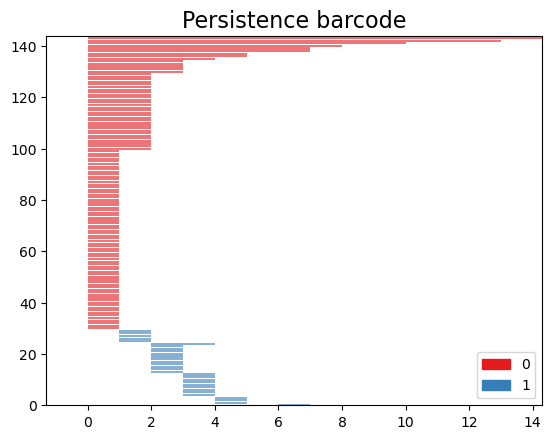

In [46]:
gd.plot_persistence_barcode(complex_pseudo[0],legend=True)

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

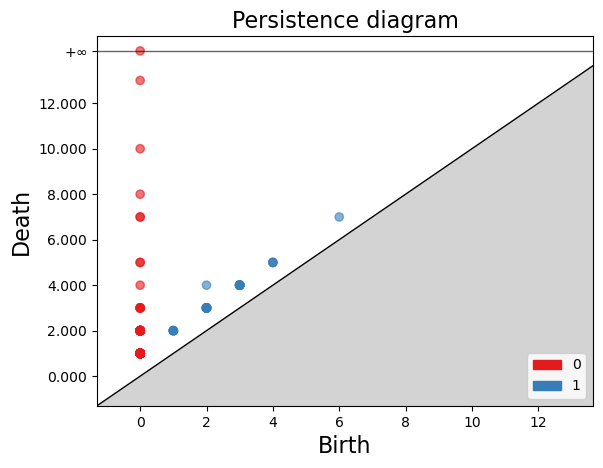

In [47]:
gd.plot_persistence_diagram(complex_pseudo[0],legend=True)

In [48]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import gudhi as gd
from scipy.spatial.distance import hamming
import plotly.graph_objs as go
import networkx as nx
import plotly.graph_objects as go
import plotly.io as pio

In [49]:
def visualize_simplicial_complex(simplex_tree, filtration_value, vertex_names=None, save_filename=None, plot_size=1, dpi=600, pos=None):
    G = nx.Graph()
    triangles = []  # List to store triangles (3-nodes simplices)
    
    for simplex, filt in simplex_tree.get_filtration():
        if filt <= filtration_value:
            if len(simplex) == 2:
                G.add_edge(simplex[0], simplex[1])
            elif len(simplex) == 1:
                G.add_node(simplex[0])
            elif len(simplex) == 3:
                triangles.append(simplex)
    
    # Calculate node positions if not provided
    if pos is None:
        pos = nx.spring_layout(G)
    
    # Node trace
    x_values, y_values = zip(*[pos[node] for node in G.nodes()])
    node_labels = [vertex_names[node] if vertex_names else str(node) for node in G.nodes()]
    node_trace = go.Scatter(x=x_values, y=y_values, mode='markers+text', hoverinfo='text', marker=dict(size=14), text=node_labels, textposition='top center', textfont=dict(size=14))
    
    # Edge traces
    edge_traces = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace = go.Scatter(x=[x0, x1, None], y=[y0, y1, None], mode='lines', line=dict(width=3, color='rgba(0,0,0,0.5)'))
        edge_traces.append(edge_trace)
    
    # Triangle traces
    triangle_traces = []
    for triangle in triangles:
        x0, y0 = pos[triangle[0]]
        x1, y1 = pos[triangle[1]]
        x2, y2 = pos[triangle[2]]
        triangle_trace = go.Scatter(x=[x0, x1, x2, x0, None], y=[y0, y1, y2, y0, None], fill='toself', mode='lines+markers', line=dict(width=2), fillcolor='rgba(255,0,0,0.2)')
        triangle_traces.append(triangle_trace)
    
    # Configure the layout of the plot
    layout = go.Layout(showlegend=False, hovermode='closest', xaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')), yaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')))
    
    fig = go.Figure(data=edge_traces + triangle_traces + [node_trace], layout=layout)
    
    # Set the figure size
    fig.update_layout(width=plot_size * dpi, height=plot_size * dpi)
    
    # Save the figure if a filename is provided
    if save_filename:
        pio.write_image(fig, save_filename, width=plot_size * dpi, height=plot_size * dpi, scale=1)
    
    # Show the figure
    #fig.show()

    
    

    return G

In [50]:
G=visualize_simplicial_complex(complex_pseudo[1],2)
nx.write_graphml(G, "simplex_complex.graphml")

In [51]:
from networkx.utils import not_implemented_for, pairwise
from concurrent.futures import ThreadPoolExecutor, as_completed
def minimum_cycle_basis(G, weight=None, total=None):
    """Returns a minimum weight cycle basis for G

    Minimum weight means a cycle basis for which the total weight
    (length for unweighted graphs) of all the cycles is minimum.

    Parameters
    ----------
    G : NetworkX Graph
    weight: string
        name of the edge attribute to use for edge weights

    Returns
    -------
    A list of cycle lists.  Each cycle list is a list of nodes
    which forms a cycle (loop) in G. Note that the nodes are not
    necessarily returned in an order by which they appear in the cycle
    """
    # Get connected components
    components = list(nx.connected_components(G))
    print(components)
    # Use ThreadPoolExecutor to parallelize the computation
    with ThreadPoolExecutor() as executor:
        # Submit tasks for each connected component
        future_to_component = {
            executor.submit(_min_cycle_basis, G.subgraph(component), weight, total): component
            for component in components
        }
        
        # Collect results as they complete
        results = []
        for future in as_completed(future_to_component):
            component = future_to_component[future]
            try:
                result = future.result()
                results.extend(result)
            except Exception as exc:
                print(f"Component {component} generated an exception: {exc}")

    return results

def _min_cycle_basis(G, weight,total):
    cb = []
    cont=0
    # We  extract the edges not in a spanning tree. We do not really need a
    # *minimum* spanning tree. That is why we call the next function with
    # weight=None. Depending on implementation, it may be faster as well
    tree_edges = list(nx.minimum_spanning_edges(G, weight=None, data=False))
    chords = G.edges - tree_edges - {(v, u) for u, v in tree_edges}

    # We maintain a set of vectors orthogonal to sofar found cycles
    set_orth = [{edge} for edge in chords]
    while set_orth:
        if cont==total:
            break
        base = set_orth.pop()
        # kth cycle is "parallel" to kth vector in set_orth
        cycle_edges = _min_cycle(G, base, weight)
        cycle_found=[v for u, v in cycle_edges]

        if len(cycle_found)>3:
            cb.append(cycle_found)
            cont+=1

        # now update set_orth so that k+1,k+2... th elements are
        # orthogonal to the newly found cycle, as per [p. 336, 1]
        set_orth = [
            (
                {e for e in orth if e not in base if e[::-1] not in base}
                | {e for e in base if e not in orth if e[::-1] not in orth}
            )
            if sum((e in orth or e[::-1] in orth) for e in cycle_edges) % 2
            else orth
            for orth in set_orth
        ]
    return cb


def _min_cycle(G, orth, weight):
    """
    Computes the minimum weight cycle in G,
    orthogonal to the vector orth as per [p. 338, 1]
    Use (u, 1) to indicate the lifted copy of u (denoted u' in paper).
    """
    Gi = nx.Graph()

    # Add 2 copies of each edge in G to Gi.
    # If edge is in orth, add cross edge; otherwise in-plane edge
    for u, v, wt in G.edges(data=weight, default=1):
        if (u, v) in orth or (v, u) in orth:
            Gi.add_edges_from([(u, (v, 1)), ((u, 1), v)], Gi_weight=wt)
        else:
            Gi.add_edges_from([(u, v), ((u, 1), (v, 1))], Gi_weight=wt)

    # find the shortest length in Gi between n and (n, 1) for each n
    # Note: Use "Gi_weight" for name of weight attribute
    spl = nx.shortest_path_length
    lift = {n: spl(Gi, source=n, target=(n, 1), weight="Gi_weight") for n in G}

    # Now compute that short path in Gi, which translates to a cycle in G
    start = min(lift, key=lift.get)
    end = (start, 1)
    min_path_i = nx.shortest_path(Gi, source=start, target=end, weight="Gi_weight")

    # Now we obtain the actual path, re-map nodes in Gi to those in G
    min_path = [n if n in G else n[0] for n in min_path_i]

    # Now remove the edges that occur two times
    # two passes: flag which edges get kept, then build it
    edgelist = list(pairwise(min_path))
    edgeset = set()
    for e in edgelist:
        if e in edgeset:
            edgeset.remove(e)
        elif e[::-1] in edgeset:
            edgeset.remove(e[::-1])
        else:
            edgeset.add(e)

    min_edgelist = []
    for e in edgelist:
        if e in edgeset:
            min_edgelist.append(e)
            edgeset.remove(e)
        elif e[::-1] in edgeset:
            min_edgelist.append(e[::-1])
            edgeset.remove(e[::-1])

    return min_edgelist

In [52]:
def find_all_cycles(simplex_tree,persistence):
    born_and_number = born_filtraton_value_holes(persistence)
    G=nx.Graph()
    born=born_and_number.keys()
    ciclos_dep=set()
    filtration=0
    for simplex, filt in simplex_tree.get_filtration():
        #if len(ciclos_dep)==num_holes:
         #   break
        
        if filtration!=filt and filtration in born:
            number=born_and_number[filtration]
            print('se buscan ciclos en el tiempo', filt)
            ciclos=minimum_cycle_basis(G,total=number)
            for ciclo in ciclos:
                if len(ciclo)>3:
                    print('Se encontró el ciclo',ciclo,'en el tiempo', filtration)
                    ciclos_dep.add(tuple(ciclo))
                    #Se llena el hoyo
                    for i in ciclo:
                        for j in ciclo:
                            G.add_edge(i,j)
                            
            
        filtration=filt
        
        if len(simplex)==2:
            G.add_edge(simplex[0], simplex[1])

        

    return ciclos_dep

In [53]:
def born_filtraton_value_holes(persistence):
    born=[]
    for bar in persistence:
        if bar[0]==1:
            born.append(bar[1][0])
            
    born_and_number=set([(x,born.count(x)) for x  in born])

    return dict(born_and_number)
    

In [54]:
%%time
ciclos_pseudo=find_all_cycles(complex_pseudo[1],complex_pseudo[0])

se buscan ciclos en el tiempo 2.0
[{17, 18, 19, 23, 29, 30, 34, 35, 41, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 61, 63, 64, 65, 67, 68, 70, 75, 76, 78, 80, 81, 86, 87, 88, 89, 91, 97, 99, 100, 102, 107, 109, 110, 112, 114, 115, 116, 117, 119, 120, 121, 122, 124, 125, 126, 129, 131, 133, 136, 137, 138, 140, 143, 144, 145, 152, 153, 166, 167, 168, 170, 171, 172, 173, 178, 184, 190, 191, 192, 193, 194, 195, 196, 197, 201, 203}, {149, 26, 31, 36, 37, 38, 39, 40, 43, 73, 74, 77, 79, 90, 93, 94, 95, 96, 103, 104, 105, 106, 113}, {32, 66, 130, 71, 44, 45, 46, 83, 22, 24, 59, 28, 127}, {42, 51, 60}, {101, 135, 202, 139, 111, 188, 84, 180, 118, 25, 186, 92}, {154, 155, 156, 157, 159, 160, 162, 163, 164, 165, 174, 175, 176, 177, 179, 182, 183, 185, 189}, {198, 199, 204, 205, 206, 207, 208, 210, 211, 187}, {212, 213, 214}, {3, 8, 9, 11, 12, 14, 58}, {128, 132, 181}, {82, 150}, {161, 147}]
Se encontró el ciclo [116, 143, 76, 29] en el tiempo 1.0
Se encontró el ciclo [125, 133, 88, 41] en el tiempo

In [56]:
len(ciclos_pseudo)


30

In [ ]:
from concurrent.futures import ProcessPoolExecutor


def find_cycles_at_filtration(G, filtration, born_and_number):
    born=born_and_number.keys()
    ciclos_dep = set()
    if filtration in born:
        number=born_and_number[filtration]
        print('se buscan',number,'ciclos')
        ciclos = minimum_cycle_basis(G,total=20)
        print('Se encontraron los ciclos',ciclos)
        for ciclo in ciclos:
            ciclos_dep.add(tuple(ciclo))
                #Se llena el hoyo
            for i in ciclo:
                for j in ciclo:
                    G.add_edge(i, j)
    return ciclos_dep

def find_all_cycles(simplex_tree, persistence):
    born_and_number = born_filtraton_value_holes(persistence)
    
    G = nx.Graph()
    ciclos_dep = set()
    filtration = 0
    
    with ProcessPoolExecutor() as executor:
        futures = []
        for simplex, filt in simplex_tree.get_filtration():
            if filtration != filt:
                future = executor.submit(find_cycles_at_filtration, G.copy(), filtration, born_and_number)
                futures.append(future)
            filtration = filt
            if len(simplex) == 2:
                G.add_edge(simplex[0], simplex[1])
        
        for future in futures:
            ciclos_dep.update(future.result())

    return ciclos_dep

In [ ]:
import networkx as nx
from concurrent.futures import ProcessPoolExecutor

def find_cycle_basis(subgraph):
    return list(nx.minimum_cycle_basis(subgraph))

def get_subgraphs(graph):
    return [graph.subgraph(c) for c in nx.connected_components(graph)]

def parallel_minimum_cycle_basis(graph):
    subgraphs = get_subgraphs(graph)
    with ProcessPoolExecutor() as executor:
        results = list(executor.map(find_cycle_basis, subgraphs))
    
    # Combinar resultados
    cycle_basis = [cycle for sublist in results for cycle in sublist]
    
    return cycle_basis

In [ ]:
[12,12].count(12)

In [ ]:
from multiprocessing.pool import Pool as ProcessPool

In [ ]:
with ProcessPool(processes=8) as pool:  # context manager providing a `Pool` instance
    result = pool.map(find_all_cycles, complex_pseudo[1],complex_pseudo[0])

In [ ]:
contador=0
for i in complex_pseudo[0]:
    if i[0]==1:
        contador+=1
contador

In [ ]:
G = nx.Graph()
nx.add_cycle(G,[195, 212, 167, 187])
nx.add_cycle(G,[212, 116, 150, 187])
nx.add_cycle(G,[212, 200, 201, 190])

#nx.add_cycle(G,[33, 84, 90, 26])
#nx.add_cycle(G,[24, 88, 28, 78])
#nx.add_cycle(G,[184, 88, 28, 141])
#nx.add_cycle(G,[136, 24, 92, 78])

#nx.add_cycle(G,[17, 8, 58, 30])
#nx.add_cycle(G,[17, 20, 69, 29])
#nx.add_cycle(G,[13, 75, 29, 62])

In [ ]:
nx.draw(G, with_labels = True)

# complex_pseudo[0]

In [ ]:
def find_cycles(simplex_tree, filtration_value):
    G=nx.Graph()
    for simplex, filt in simplex_tree.get_filtration():
        if filt <= filtration_value:
            if len(simplex) == 2:
                G.add_edge(simplex[0], simplex[1])
    

    #ciclos=nx.cycle_basis(G)
    ciclos=nx.minimum_cycle_basis(G)
    ciclos_dep=set()
    for ciclo in ciclos:
        if len(ciclo)>3:
            print('Se encontró el ciclo',ciclo,'en el tiempo', filtration_value)
            ciclos_dep.add(tuple(ciclo))

    return G

In [ ]:
1+1

<h2>Generar transferencia horizontal </h2>

In [ ]:
def mutate(genome, prob, mutated_positions):
    """Performs mutations on a genome with a certain probability."""
    mutations = []
    for i in range(len(genome)):
        if not mutated_positions[i] and np.random.rand() < prob:
            genome[i] = 1 if genome[i] == 0 else 0
            mutations.append(i)
            mutated_positions[i] = True
    return genome, mutations

def create_generation(population, num_offspring, prob, mutated_positions):
    """Creates a new generation from the existing population."""
    new_population = []
    new_generation_history = []
    for idx, genome in enumerate(population):
        for _ in range(num_offspring):
            new_genome, mutations = mutate(genome.copy(), prob, mutated_positions)
            new_population.append(new_genome)
            new_generation_history.append({'parent': idx, 'mutations': mutations})
    return new_population, new_generation_history

def create_population(num_genes, mutation_probability, num_generations, num_offspring, percentage_ones,semilla):
    np.random.seed(semilla)

    initial_genome = np.random.choice([0, 1], size=num_genes, p=[1-percentage_ones, percentage_ones])
    population = [initial_genome]
    genome_history = []
    global_mutated_positions = np.zeros(num_genes, dtype=bool)

    for generation in range(num_generations):
        population, generation_history = create_generation(population, num_offspring, mutation_probability, global_mutated_positions)
        genome_history.extend(generation_history)
        print(f"Generation {generation+1}: {len(population)} genomes")
        # Uncomment the next line if you want to see the details of each generation
        # print(len(population), generation_history)

    return population, genome_history

In [ ]:
# Example usage
num_genes = 505
mutation_probability = 1 / num_genes
num_generations = 7
num_offspring = 2
percentage_ones = 0.25

population, population_genome_history = create_population(num_genes, mutation_probability, num_generations, num_offspring, percentage_ones,42)
population = np.array(population)

In [ ]:
def modify_genomes(population, num_groups, group_size, num_positions_to_change):
    np.random.seed(42)  # Puedes usar cualquier número como semilla

    # Crear una copia de la población para evitar modificar el original
    modified_population = population.copy()

    for _ in range(num_groups):
        # Seleccionar genomas de manera aleatoria
        genome_indices = np.random.choice(population.shape[0], group_size, replace=False)
        
        # Elegir un punto de inicio al azar y seleccionar posiciones contiguas para cambiar
        start_position = np.random.choice(population.shape[1] - num_positions_to_change)
        positions_to_change = np.arange(start_position, start_position + num_positions_to_change)
        
        for index in genome_indices:
            # Cambiar los valores en las posiciones seleccionadas a 1
            modified_population[index, positions_to_change] = 1
    
    return modified_population

In [ ]:
population_2=modify_genomes(population, num_groups=2, group_size=3, num_positions_to_change=population.shape[1]//32)

In [ ]:
hamming_matrix_2 = calculate_hamming_matrix(population_2)
#hamming_matrix_2

# Print the normalized Hamming distance matrix
#print("Normalized Hamming Distance Matrix:")
#print(normalized_hamming_matrix_2)
persistence2, simplex_tree2 = create_complex(hamming_matrix_2)
gd.plot_persistence_barcode(persistence2)
gd.plot_persistence_diagram(persistence2)